In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('MagicBricks.csv')
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


# Data Preprocessing

In [3]:
df.shape

(1259, 11)

In [4]:
# Null check
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [5]:
df['Per_Sqft'].value_counts().nunique()

21

In [6]:
df['Price']/df['Area']

0        8125.000000
1        6666.666667
2       16315.789474
3        7000.000000
4        9538.461538
            ...     
1254    13355.998057
1255    11904.761905
1256    20000.000000
1257    11616.161616
1258     1674.208145
Length: 1259, dtype: float64

In [7]:
df['Per_Sqft']=df['Per_Sqft'].fillna(df['Price']/df['Area'])

In [8]:
df['Per_Sqft'].isnull().sum()

0

In [9]:
df.nunique()

Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       365
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       433
dtype: int64

In [10]:
df['Bathroom'].value_counts().nunique()

7

In [11]:
# Replacing missing values in Parking, Bathroom, Furnishing and Type
df['Parking'].fillna(df['Parking'].mode, inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode, inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode, inplace=True)
df['Type'].fillna(df['Type'].mode, inplace=True)

In [12]:
df['Parking'].isnull().sum()

0

In [13]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [14]:
df.dtypes

Area           float64
BHK              int64
Bathroom        object
Furnishing      object
Locality        object
Parking         object
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [15]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [16]:
df.dtypes

Area           float64
BHK              int64
Bathroom        object
Furnishing      object
Locality        object
Parking         object
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [17]:
# Type casting
df["Parking"] = pd.to_numeric(df["Parking"], errors='coerce').fillna(0, downcast='infer')
df["Bathroom"] = pd.to_numeric(df["Bathroom"], errors='coerce').fillna(0, downcast='infer')

In [18]:
df.dtypes

Area           float64
BHK              int64
Bathroom         int64
Furnishing      object
Locality        object
Parking          int64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [19]:
# Check the unique values
df.nunique()

Area           315
BHK              8
Bathroom         8
Furnishing       4
Locality       365
Parking         10
Price          284
Status           2
Transaction      2
Type             3
Per_Sqft       433
dtype: int64

In [20]:
df['Area_Yards'] = df['Area']/9

In [21]:
# convert the locality
def grp_locality(locality):
    locality=locality.lower()
    if 'rohini' in locality:
        return 'Rohini Sector'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'paschim' in locality:
        return 'Paschim Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'vasundhar' in locality:
        return 'Vasundhara Enclave'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    else:
        return 'Other'

In [22]:
df['Locality']=df['Locality'].apply(grp_locality)

In [23]:
df.tail(2)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
1257,990.0,2,2,Unfurnished,Other,1,11500000,Ready_to_move,Resale,Builder_Floor,12916.0,110.000000
1258,11050.0,3,3,Unfurnished,Other,1,18500000,Ready_to_move,New_Property,Builder_Floor,12916.0,1227.777778


In [24]:
df['Locality'].value_counts()

Other                 716
Lajpat Nagar           90
Dwarka Sector          87
Rohini Sector          75
Shahdara               75
Alaknanda              58
Vasant Kunj            35
Kalkaji                32
Punjabi Bagh           31
Paschim Vihar          30
Vasundhara Enclave     30
Name: Locality, dtype: int64

<AxesSubplot:>

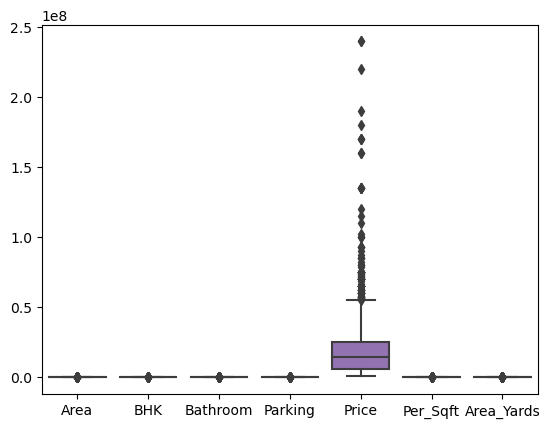

In [25]:
sns.boxplot(df)

In [26]:
# remove the outliers in it

In [27]:
from scipy import stats
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
# Removing outliers
df = df[(z < 3).all(axis=1)]
# remove the outliers after 3rd std

In [28]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Area_Yards
count,1189.000000,1189.000000,1189.000000,1189.000000,1.189000e+03,1189.000000,1189.000000
mean,1296.421567,2.735913,2.480235,1.383516,1.852459e+07,12629.785274,144.046841
std,750.284776,0.859232,0.957333,0.752726,1.772598e+07,8434.085021,83.364975
min,28.000000,1.000000,0.000000,0.000000,1.000000e+06,1250.000000,3.111111
25%,800.000000,2.000000,2.000000,1.000000,5.510000e+06,6526.000000,88.888889
50%,1150.000000,3.000000,2.000000,1.000000,1.350000e+07,10943.000000,127.777778
75%,1600.000000,3.000000,3.000000,2.000000,2.490000e+07,16584.000000,177.777778
max,5220.000000,5.000000,5.000000,10.000000,9.300000e+07,72000.000000,580.000000


# EDA

In [29]:
# Area of House

Text(0.5, 1.0, 'Area in Yards')

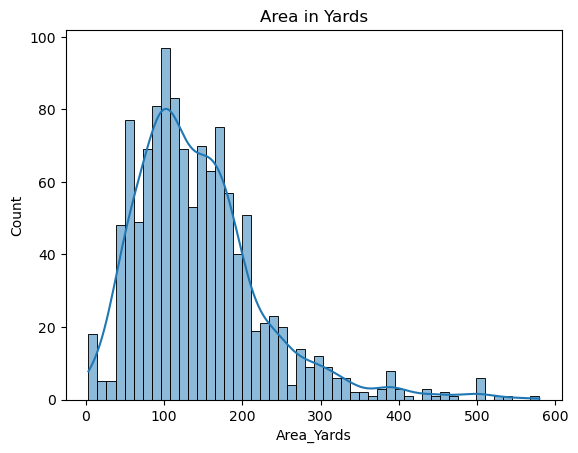

In [30]:
sns.histplot(x = df['Area_Yards'],  kde = True, bins = 50).set_title('Area in Yards')

In [31]:
# From the above we can say in delhi most of the area_yards of the house is 50 to 200

# Distribution of BHK

<AxesSubplot:xlabel='BHK', ylabel='count'>

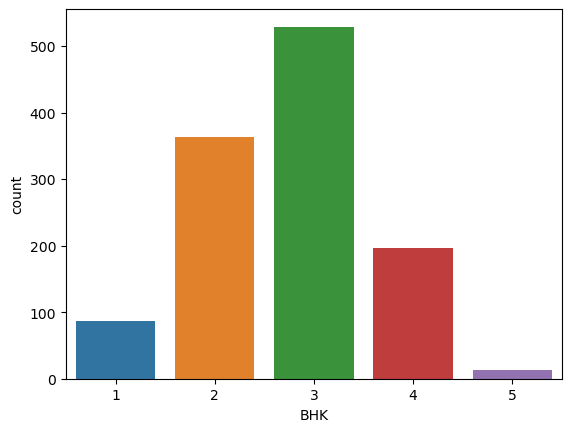

In [32]:
sns.countplot(x=df['BHK'],data=df)

In [33]:
# from above diagram we can say that in delhi most of the people have 2 and 3 BHK then leass people have 1 & 4 BHK but very less have 5 BHK

# Distribution Of BAthroom

<AxesSubplot:xlabel='Bathroom', ylabel='count'>

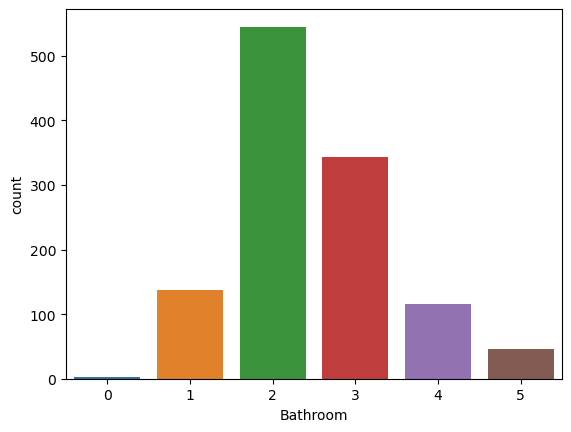

In [34]:
sns.countplot(x=df['Bathroom'],data=df)

In [35]:
# Most of the people have 2 & 3 bahrooms, then less have 1 & 4, and very less have 5 bathrooms

# Distribution of Furnishing

In [36]:
df['Furnishing'].value_counts()

Semi-Furnished                                                                                                                                                                                                                                                                                                                                         673
Unfurnished                                                                                                                                                                                                                                                                                                                                            338
Furnished                                                                                                                                                                                                                                                                                                         

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Semi-Furnished'),
  Text(1, 0, 'Furnished'),
  Text(2, 0, 'Unfurnished'),
  Text(3, 0, '<bound method Series.mode of 0       Semi-Furnished\n1       Semi-Furnished\n2            Furnished\n3       Semi-Furnished\n4       Semi-Furnished\n             ...      \n1254       Unfurnished\n1255    Semi-Furnished\n1256    Semi-Furnished\n1257       Unfurnished\n1258       Unfurnished\nName: Furnishing, Length: 1259, dtype: object>')])

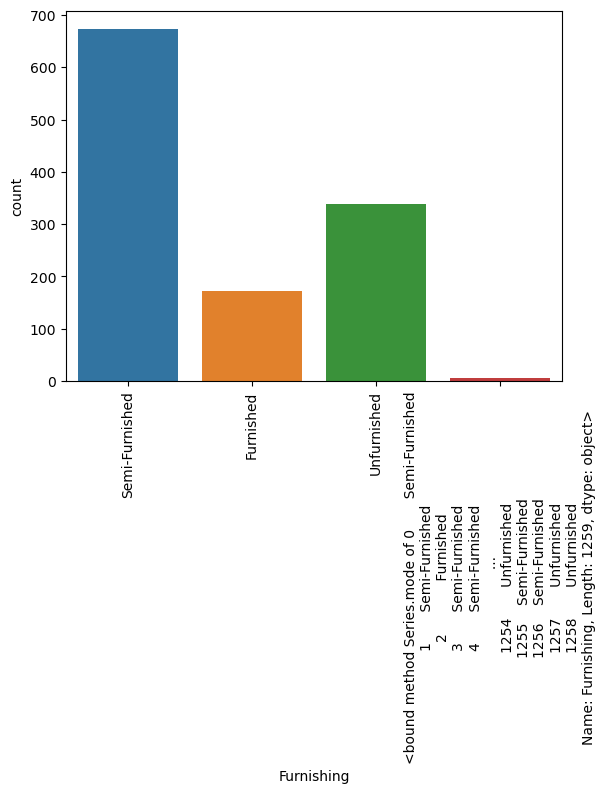

In [37]:
sns.countplot(x='Furnishing',data=df)
plt.xticks(rotation=90)

In [38]:
# most of the houses are semi furnished and less ar furnished and unfurnish are high than the furnished

# Distribution of locality

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

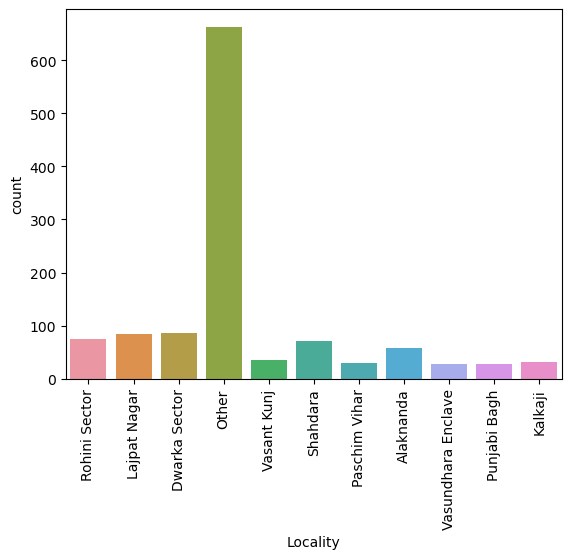

In [39]:
sns.countplot(x='Locality',data=df)
plt.xticks(rotation=90)

In [40]:
# others>DS>LN>RS>shahdra>alaknanada

# Distribution Of Parking

<AxesSubplot:xlabel='Parking', ylabel='count'>

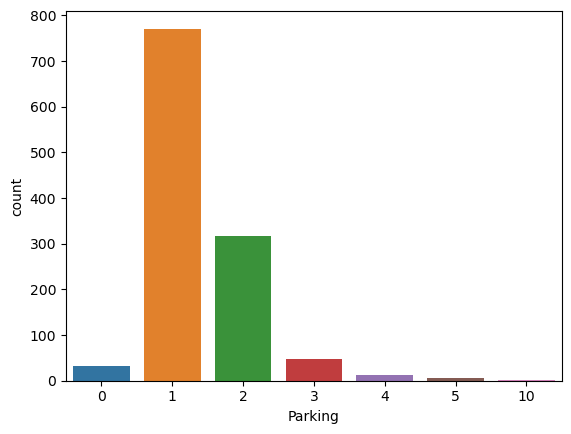

In [41]:
sns.countplot(x='Parking',data=df)

In [42]:
# Most of the house have atleast one parking and then 2 aprking

# Distribution of status

<AxesSubplot:xlabel='Status', ylabel='count'>

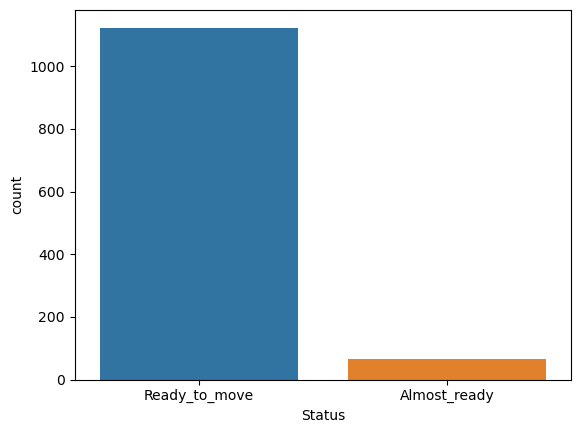

In [43]:
sns.countplot(x='Status',data=df)

In [44]:
# Most of the houses are ready to move condition

# Distribution of Transaction type

<AxesSubplot:xlabel='Transaction', ylabel='count'>

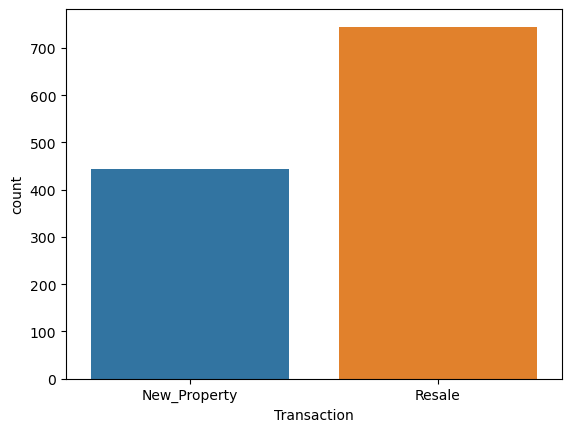

In [45]:
sns.countplot(x='Transaction',data=df)

In [46]:
# most of the properties are resale as compare to Newproperty

# Distribution of house type

<AxesSubplot:xlabel='Type', ylabel='count'>

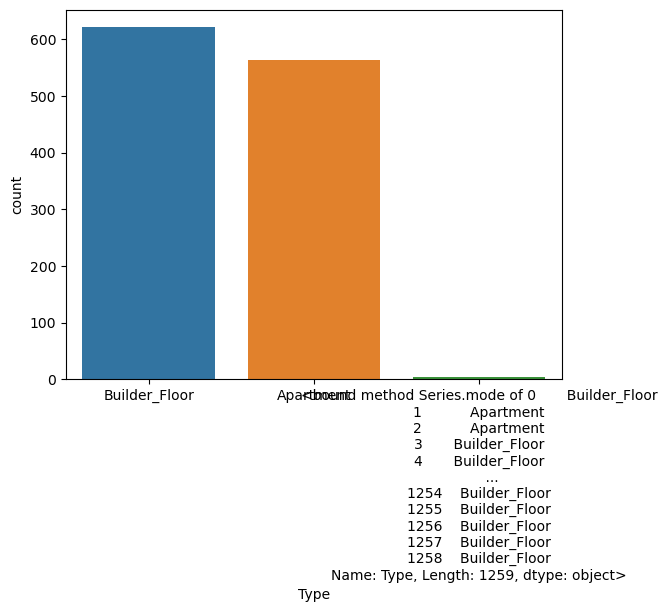

In [47]:
sns.countplot(x='Type',data=df)

In [48]:
# Building and apartment are quite same so don't consider this

# No we will focus on Multivariate analysis

In [49]:
# area and price

<AxesSubplot:xlabel='Area_Yards', ylabel='Price'>

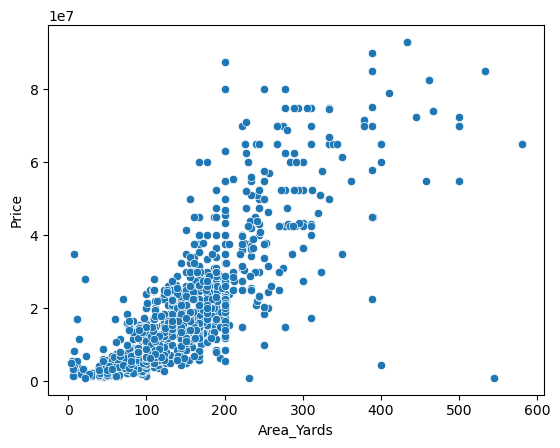

In [50]:
sns.scatterplot(x=df['Area_Yards'],y=df['Price'],data=df)

In [51]:
# From above diagrm we can say that the if Area_yards increases then price also increase

# BHK nd Price

<AxesSubplot:xlabel='BHK', ylabel='Price'>

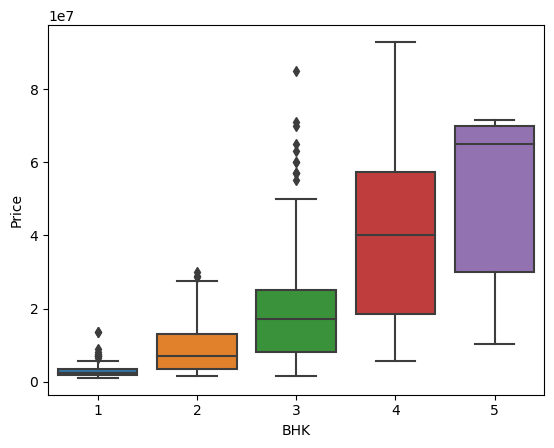

In [52]:
sns.boxplot(x=df['BHK'],y=df['Price'],data=df)

##### From this boxplot, we get to know about the relation between the price of the house and the BHK count. We can see that the price of the house increases with the increase in the BHK count, which evident from the fact that 5 BHK houses have the highes median price i.e. nearly 7,00,00,000 INR followed by 4 BHK houses with median price of nearly 4,00,00,000 INR. Incomparison to that, 3BHK houses have median price near about 1 crore INR and 2BHK houses have median price of nearly 50,00,000 INR. The 1BHK houses have the lowest median price of nearly 30,00,000 INR

# Bathroom and Price

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

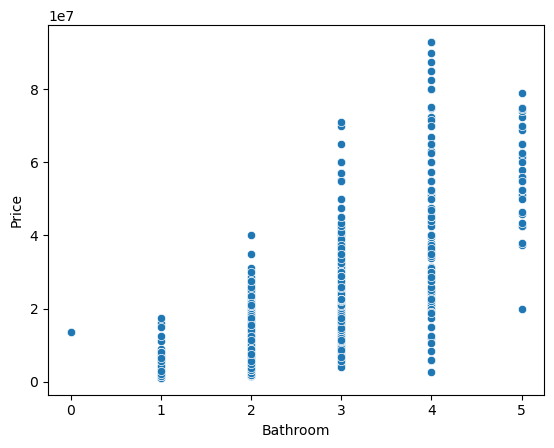

In [53]:
sns.scatterplot(x=df['Bathroom'],y=df['Price'],data=df)

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

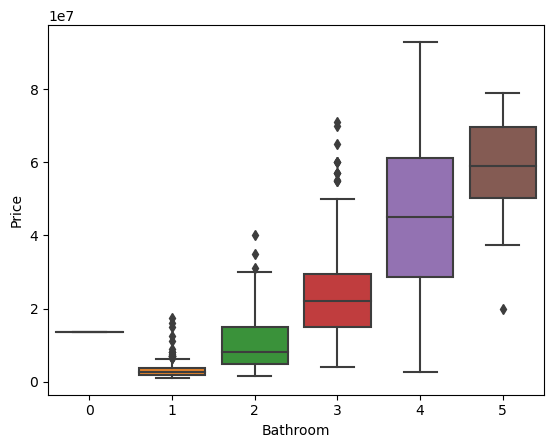

In [54]:
sns.boxplot(x=df['Bathroom'],y=df['Price'],data=df)

#### startig price of the 5 Bathroom house are more expenseive as compare to others

# area_yard and bhk and price 

<AxesSubplot:xlabel='BHK', ylabel='Area_Yards'>

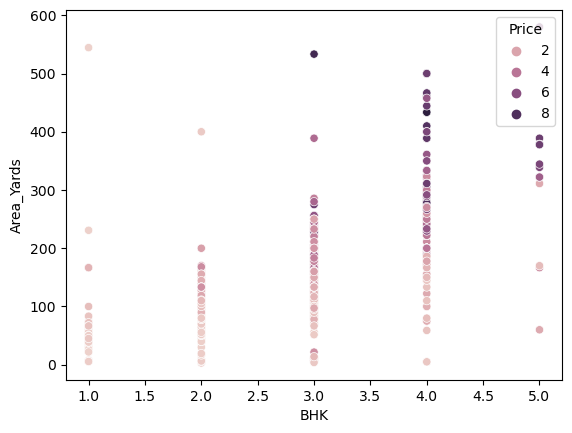

In [55]:
sns.scatterplot(x=df['BHK'],y=df['Area_Yards'],hue=df['Price'])

In [56]:
#### from above we an say that te bhk and Area affect the price

In [57]:
df.head(2)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,800.0,3,2,Semi-Furnished,Rohini Sector,1,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0,88.888889
1,750.0,2,2,Semi-Furnished,Rohini Sector,1,5000000,Ready_to_move,New_Property,Apartment,6667.0,83.333333


# price according to locality bhk and price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

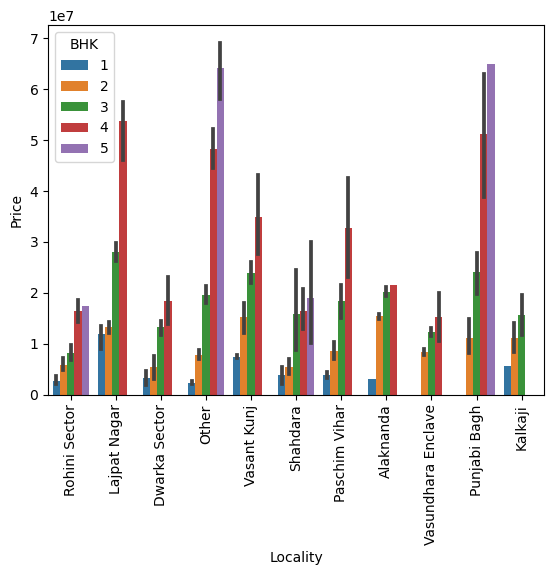

In [58]:
sns.barplot(x=df['Locality'],y=df['Price'],hue=df['BHK'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

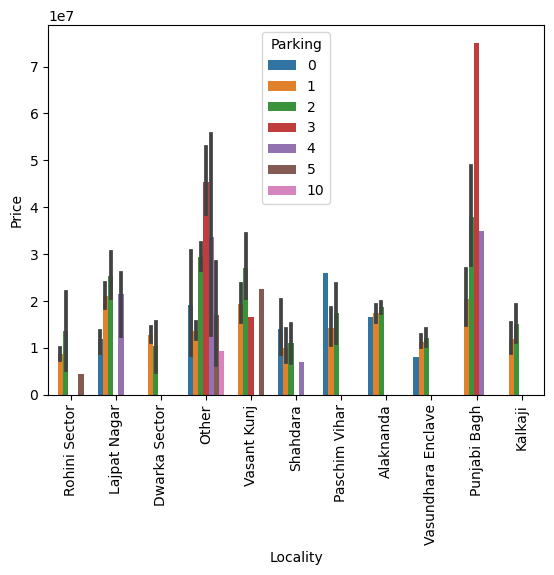

In [59]:
sns.barplot(x=df['Locality'],y=df['Price'],hue=df['Parking'])
plt.xticks(rotation=90)

# data Pre-processing

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 0 to 1257
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1189 non-null   float64
 1   BHK          1189 non-null   int64  
 2   Bathroom     1189 non-null   int64  
 3   Furnishing   1189 non-null   object 
 4   Locality     1189 non-null   object 
 5   Parking      1189 non-null   int64  
 6   Price        1189 non-null   int64  
 7   Status       1189 non-null   object 
 8   Transaction  1189 non-null   object 
 9   Type         1189 non-null   object 
 10  Per_Sqft     1189 non-null   float64
 11  Area_Yards   1189 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 120.8+ KB


In [61]:
df.nunique()

Area           283
BHK              5
Bathroom         6
Furnishing       4
Locality        11
Parking          7
Price          266
Status           2
Transaction      2
Type             3
Per_Sqft       413
Area_Yards     283
dtype: int64

In [62]:
# Lets change/encode the status, type,transaction,locality,furnishing

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Status', 'Type','Transaction','Locality','Furnishing']

In [64]:
df[['Status', 'Type','Transaction','Locality','Furnishing']]=df[['Status', 'Type','Transaction','Locality','Furnishing']].astype(str)

In [66]:
df[['Status', 'Type','Transaction','Locality','Furnishing']]=df[['Status', 'Type','Transaction','Locality','Furnishing']].apply(le.fit_transform)

In [67]:
df.head(2)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,800.0,3,2,2,7,1,6500000,1,0,2,8125.0,88.888889
1,750.0,2,2,2,7,1,5000000,1,0,1,6667.0,83.333333


In [68]:
# Lets normalize the area,price,per_sqft,area_yards

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
min_max=MinMaxScaler()

In [71]:
df[['Area','Price','Per_Sqft','Area_Yards']]=min_max.fit_transform(df[['Area','Price','Per_Sqft','Area_Yards']])

In [72]:
df.head(2)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,0.14869,3,2,2,7,1,0.059783,1,0,2,0.097173,0.14869
1,0.13906,2,2,2,7,1,0.043478,1,0,1,0.076565,0.13906


In [73]:
df.corr()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
Area,1.000000,0.703013,0.763635,-0.014932,-0.069884,0.311484,0.823867,-0.098966,-0.099958,0.048496,0.236942,1.000000
BHK,0.703013,1.000000,0.767277,-0.098705,0.006102,0.236119,0.628698,-0.087372,-0.142226,0.091902,0.219093,0.703013
Bathroom,0.763635,0.767277,1.000000,-0.011313,-0.053726,0.335262,0.763963,-0.108646,-0.188558,0.140436,0.251626,0.763635
Furnishing,-0.014932,-0.098705,-0.011313,1.000000,-0.121132,-0.010991,0.004387,-0.041449,-0.040108,0.059855,-0.065917,-0.014932
Locality,-0.069884,0.006102,-0.053726,-0.121132,1.000000,-0.067792,-0.056680,0.005219,-0.026085,0.053730,-0.001558,-0.069884
Parking,0.311484,0.236119,0.335262,-0.010991,-0.067792,1.000000,0.338524,-0.003359,-0.036325,0.076470,0.177188,0.311484
Price,0.823867,0.628698,0.763963,0.004387,-0.056680,0.338524,1.000000,-0.157363,-0.183581,0.111841,0.412699,0.823867
Status,-0.098966,-0.087372,-0.108646,-0.041449,0.005219,-0.003359,-0.157363,1.000000,0.245685,0.030320,-0.104857,-0.098966
Transaction,-0.099958,-0.142226,-0.188558,-0.040108,-0.026085,-0.036325,-0.183581,0.245685,1.000000,-0.232636,-0.021836,-0.099958
Type,0.048496,0.091902,0.140436,0.059855,0.053730,0.076470,0.111841,0.030320,-0.232636,1.000000,0.080698,0.048496


<AxesSubplot:>

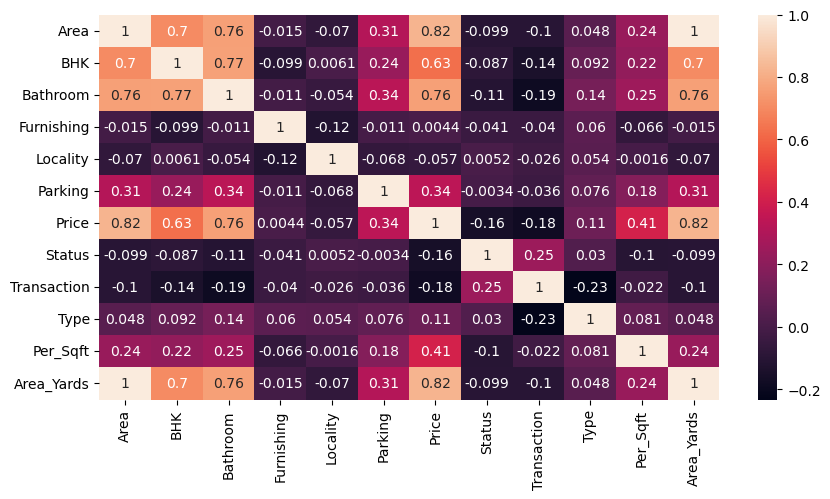

In [74]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(),annot=True,)

In [75]:
# Drop per_sqft
df.drop(columns='Per_Sqft',axis=1,inplace=True)

In [76]:
df.head(2)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Area_Yards
0,0.14869,3,2,2,7,1,0.059783,1,0,2,0.14869
1,0.13906,2,2,2,7,1,0.043478,1,0,1,0.13906


# Train Test Split

In [77]:
X=df.drop(columns='Price')
y=df['Price']

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# Model Building

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [80]:
dtr=DecisionTreeRegressor()
rft=RandomForestRegressor()

In [81]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [82]:
dtr.score(X_train,y_train)

0.9912903826613969

In [83]:
rft.fit(X_train,y_train)
rft.score(X_train,y_train)

0.9640908317243791

In [86]:
params={
    'n_estimators':[100,150,180,200],
    'random_state':[0,42]
}

In [88]:
from sklearn.model_selection import GridSearchCV
gvr=GridSearchCV(rft,param_grid=params)

In [90]:
gvr.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 150, 180, 200],
                         'random_state': [0, 42]})

In [91]:
gvr.score(X_train,y_train)

0.9652222529925024

In [92]:
par={
    'max_depth':[2,4,6,8],
               'min_samples_split':[2,4,6,8],
               'min_samples_leaf':[1,2,3,4],
               'max_features':['auto','sqrt','log2'],
               'random_state':[0,42]
}

In [94]:
grid_search = GridSearchCV(dtr, param_grid=par, cv=5, scoring='neg_mean_squared_error')

In [96]:
df.duplicated().sum()

103

In [97]:
from sklearn.linear_model import LinearRegression
lrr=LinearRegression()

In [98]:
lrr.fit(X_train,y_train)

LinearRegression()

In [99]:
lrr.score(X_train,y_train)

0.7306090238257124

In [100]:
rft_pred=rft.predict(X_test)

In [103]:
rftt=pd.DataFrame({
    'Actual':y_test,
    'Predicted':rft_pred
})


In [102]:
rftt.head(10)

,Actual,Predicted
346,0.190217,0.184043
1223,0.597826,0.497380
959,0.076087,0.078335
87,0.009239,0.030527
991,0.028261,0.011755
492,0.641304,0.515793
1108,0.217391,0.346707
722,0.157609,0.185330
350,0.695652,0.274620
391,0.039348,0.038893


In [ ]:
import pickle
pickle.dump(rft,open('rft'))